## The Sparks Foundation
### Function: Data Science and Business Analytics
## Task 2- Prediction Using Unsupervised ML
### Submitted by: Kumari Soni (July 2021 Batch)

In [1]:
# Import all the required libraries
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [2]:
# Load the dataset
data = pd.read_csv("Iris.csv")

# Print top 5 values of the dataset to get idea about the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check if there is any null value in the Dataset
data.isnull().sum()

# We observe that there is no null value present

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
# Print the information of the dataset to get ingights of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Count of each species
data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

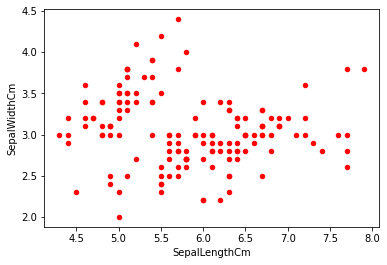

In [6]:
# Visualizing the data
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color= "red")

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

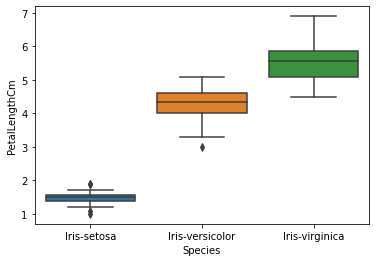

In [7]:
#Box plot
sns.boxplot(x="Species", y="PetalLengthCm", data= data)

In [8]:
# Creating another dataframe which is a copy of data but does not contain ID
data1= data.iloc[:, 1:]
data1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


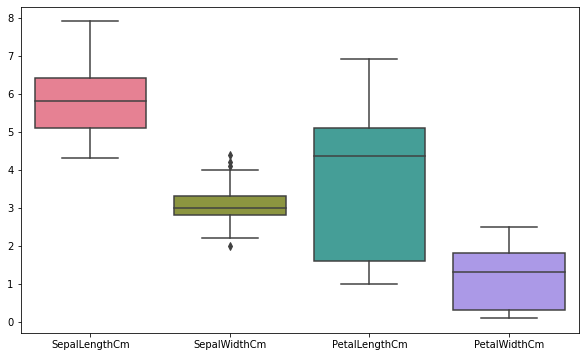

In [9]:
# Distribution of data using Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=data1, palette= "husl")
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

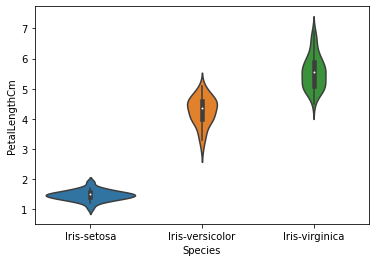

In [10]:
# Violinplot
sns.violinplot(x="Species", y="PetalLengthCm", data= data)

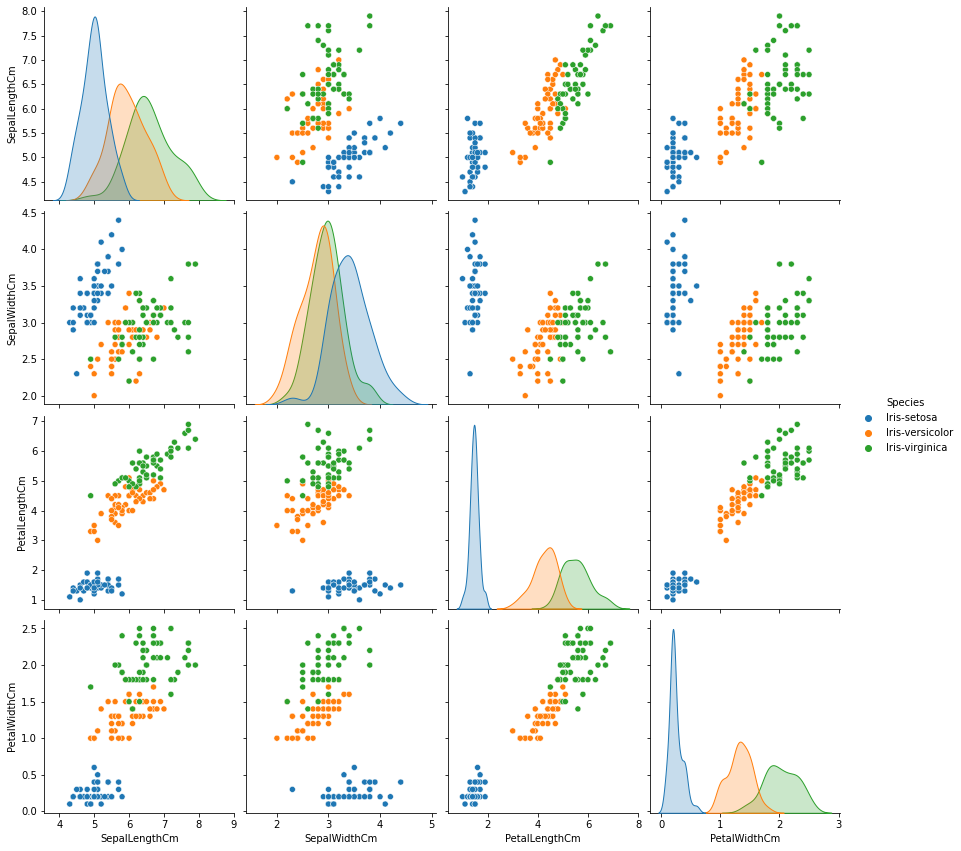

In [11]:
# Bivariate relation between each pair of features
sns.pairplot(data1, hue="Species", size=3)

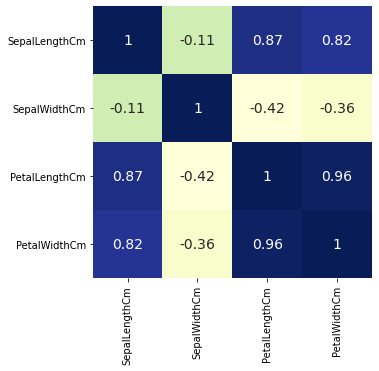

In [12]:
# Correlation of data
plt.figure(figsize=(5,5))
sns.heatmap(data1.corr(), cmap='YlGnBu', annot=True, 
            cbar=False, annot_kws={'size': 14})
plt.show()

In [13]:
# Let X be a data frame containing only independent attributes of data1
X = data1.iloc[:, [0,1,2,3]].values

In [14]:
# K Means Clustering 
#Let k=7
kMeans7=KMeans(n_clusters=7)
y_kMeans7= kMeans7.fit_predict(X) #we don't need ID
print(y_kMeans7)

[0 5 5 5 0 0 5 5 5 5 0 5 5 5 0 0 0 0 0 0 0 0 5 0 5 5 0 0 0 5 5 0 0 0 5 5 0
 5 5 0 0 5 5 0 0 5 0 5 0 5 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 6 2 3 2 6 2 6 3
 3 3 3 3 3 2 2 2 2 6 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 6 4 1 1 4 2 4 1 4 1
 1 1 6 6 1 1 4 4 6 1 6 4 6 1 4 6 6 1 4 4 4 1 6 6 4 1 1 6 1 1 1 6 1 1 1 6 1
 1 6]


In [15]:
# Printing the cluster centres
kMeans7.cluster_centers_

array([[5.26538462, 3.68076923, 1.50384615, 0.29230769],
       [6.56086957, 3.06956522, 5.52608696, 2.15217391],
       [5.52962963, 2.62222222, 3.94074074, 1.21851852],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [4.725     , 3.13333333, 1.42083333, 0.19166667],
       [5.98333333, 2.75      , 4.98333333, 1.77222222]])

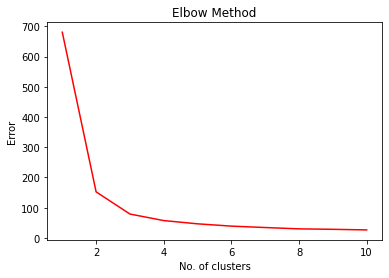

In [16]:
# ELBOW Method
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error, color= "red")
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Error')
plt.show()

### Observation:
The shape of elbow is approximately formed at k=3. 

Optimal value of k is 3.

In [17]:
# Let's implement k-means using k=3.
kMeans3=KMeans(n_clusters=3)
y_kMeans3= kMeans3.fit_predict(X) # we don't need ID
print(y_kMeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [18]:
# Printing the cluster centres
kMeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

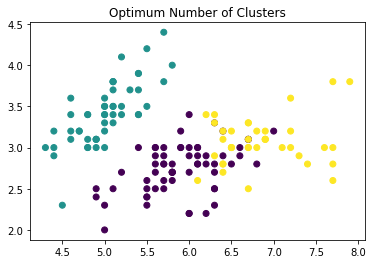

In [19]:
# Visualizing the three clusters
plt.scatter(X[:,0], X[:,1], c= y_kMeans3)
plt.title('Optimum Number of Clusters')
plt.show()

# THANK YOU ^_^